In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv (r"C:\Users\Ali\Documents\python\ab_test_data.csv")
df

,user_id,timestamp,test_group,conversion
0,7f6833e6-1141-4f20-b4b2-f1e31019b1fd,2023-07-04 4:40:56,a,0
1,e6a6e960-d3f3-4074-a516-ba1e609b211e,2023-07-06 0:26:45,b,0
2,4d3fbfa5-6847-410a-bac2-477f01d5f400,2023-07-10 20:24:34,b,0
3,361457d9-a044-48f7-981c-d67dc3861679,2023-07-20 7:04:50,b,0
4,285cd63d-7d03-427f-a062-1fa2dd2e77d6,2023-07-19 23:27:50,b,0
...,...,...,...,...
19993,6763ae9a-515c-473e-af00-0d9c4f6a5bc7,2023-07-06 3:27:37,b,0
19994,ac5600f2-4d16-4503-b115-f1a96728b6d1,2023-07-03 4:20:49,a,0
19995,5a8b2630-209b-4d83-b47f-0f3d9dd568a8,2023-07-23 16:23:49,b,1
19996,b572d68b-26ac-432b-9f88-83e0fdee4ca1,2023-07-03 18:26:21,b,0


#### H0 (Null Hipotez): Yeni abonelik ekranı tasarımının abonelik satın alma oranı üzerinde hiçbir etkisi yoktur.

#### H1 (Alternatif Hipotez): Yeni abonelik ekranı tasarımı, abonelik satın alma oranını arttırır.


In [4]:
df.user_id.nunique()

19998

## A ve B gruplarındaki kullanıcı sayısı;

In [6]:
grup_sayilari = df['test_group'].value_counts()
grup_sayilari

test_group
a    10013
b     9985
Name: count, dtype: int64

## A ve B gruplarındaki dönüşüm sayısı;

In [8]:
donusum_sayisi  = df.groupby('test_group')['conversion'].sum()
donusum_sayisi

test_group
a    611
b    889
Name: conversion, dtype: int64

 ## A ve B gruplarındaki dönüşüm oranı;

In [10]:
donusum_orani = donusum_sayisi  / grup_sayilari
print(donusum_orani)

test_group
a    0.061021
b    0.089034
dtype: float64


## Testin başlangıç tarihi, bitiş tarihi ve testin süresi (gün olarak)

In [12]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [13]:
baslangic_tarihi = df['timestamp'].min()
bitis_tarihi = df['timestamp'].max()

In [14]:
testin_suresi = (bitis_tarihi - baslangic_tarihi).days

In [15]:
print(f" Testin başlangıç tarihi: {baslangic_tarihi}")
print(f" Testin bitiş tarihi: {bitis_tarihi}")
print(f" Testin süresi: {testin_suresi}")

 Testin başlangıç tarihi: 2023-07-03 01:42:34
 Testin bitiş tarihi: 2023-07-25 01:41:19
 Testin süresi: 21


## Hipotez testleri için istediğiniz istatistiksel kriteri seçin ve istatistik değerlerini ve p-değerini hesaplayın. Null hipotezini reddedip edemeyeceğimizi kontrol edin. Hangi kriteri kullandığınızı belirtmeyi unutmayın

#### T-Testini kullanacağım.

In [18]:
from scipy import stats

alpha = 0.05

statistic, pvalue = stats.ttest_ind(df[df['test_group'] == 'a']['conversion'],
                                    df[df['test_group'] == 'b']['conversion'], 
                                    alternative='less') # a'nın mean değeri, b'nin mean değerinden daha küçük olduğu için less kullandım.

print(f't-statistic: {round(statistic, 2)}, p-value: {round(pvalue, 2)}')

if pvalue < alpha:
    print('Fark istatistiksel olarak anlamlıdır. H0 reddedilir.')
else:
    print('Fark istatistiksel olarak anlamlı değildir. H0 reddedilemez.')


t-statistic: -7.53, p-value: 0.0
Fark istatistiksel olarak anlamlıdır. H0 reddedilir.


##### t-statistic: -7.53 sonucu bize A grubunun ortalamasının B grubunun ortalamasından daha küçük olduğunu gösterir.

## 95% güven aralıkları ile gruplar arasındaki ortalama değerlerin karşılaştırılması için bir görselleştirme oluşturun.

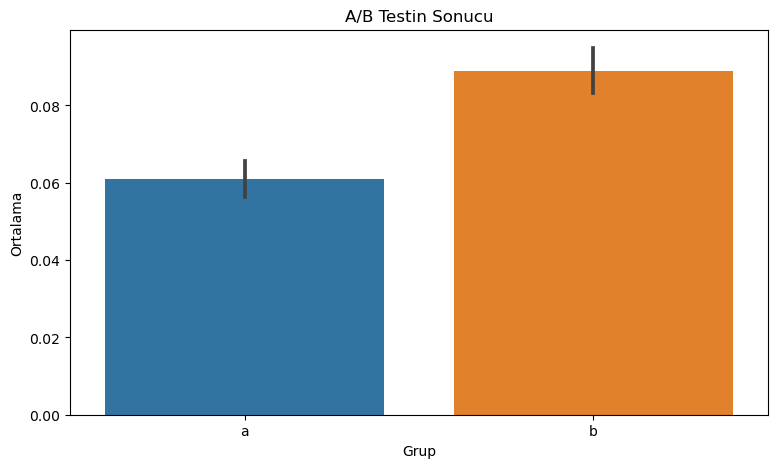

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 5))
sns.barplot(x=df['test_group'], 
            y=df['conversion'], 
            errorbar=('ci', 95)) #Güven Aralıkları

plt.title('A/B Testin Sonucu')
plt.xlabel('Grup')
plt.ylabel('Ortalama')

plt.show()



#### Grup B'nin (test grubunun) performansı Grup A'ya kıyasla daha yüksek, ve %95 güven aralığı dikkate alındığında, bu farkın istatistiksel olarak anlamlı olma ihtimali yüksek.  T-Testin sonucuna göre istatistik olarak anlamlı bir sonuç elde etmiştik.

## Bu konuda okuduğunuz önerilere göre A/B testinin sonuçları hakkında çıkarımlar hazırlayın.

#### Test sonucunda Grup B'nin ortalama dönüşüm oranı, Grup A'ya göre da yüksek. Abonelik ekranının yeni tasarımının olumlu bir etki yarattığını gösteriyor.
#### Grup B’nin başarılı olması, yeni tasarımın kullanıcılar üzerinde olumlu bir etki yarattığını gösteriyor. Bu sonuç, abonelik oranını artırma stratejisinde doğru yolda olunduğunu ve yeni tasarımın daha geniş çapta uygulanabileceğini gösteriyor.

## Bonus Görevi

## Zaman içinde dönüşüm oranının değişimini gösteren bir grafik oluşturun. Bu sefer olayın gerçekleşme zamanı ile ilgili verilerimizin olduğunu unutmayın.

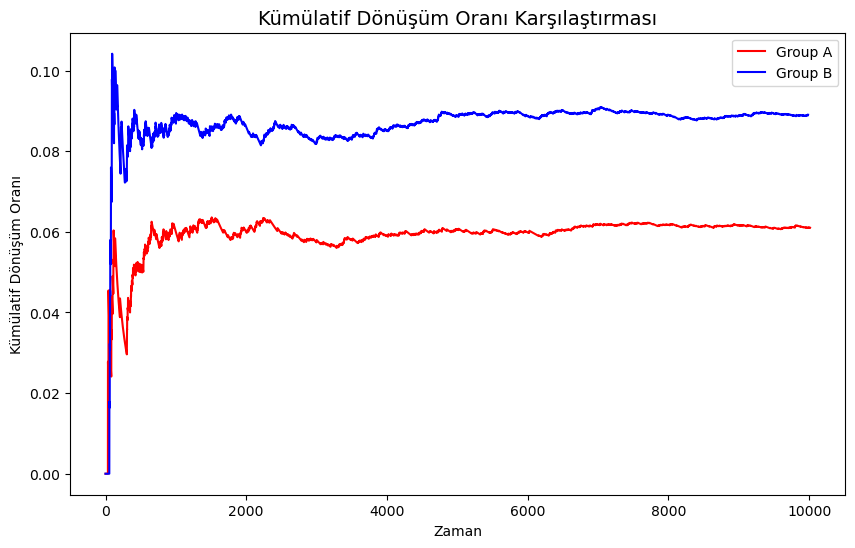

In [26]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values(by='timestamp').reset_index(drop=True)
cumulative_metric_a = df[df['test_group'] == 'a']['conversion'].expanding().mean().reset_index(drop=True)
cumulative_metric_b = df[df['test_group'] == 'b']['conversion'].expanding().mean().reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.plot(cumulative_metric_a, label='Group A', color='red')
plt.plot(cumulative_metric_b, label='Group B', color='blue')
plt.title('Kümülatif Dönüşüm Oranı Karşılaştırması', fontsize=14)
plt.xlabel('Zaman', fontsize=10)
plt.ylabel('Kümülatif Dönüşüm Oranı', fontsize=10)
plt.legend()
plt.show()